# Problem 1: Auto-Encoders

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Function to generate data 
def generate_data(n=5000, sigma=0.1):
    np.random.seed(123)
    # Create an array of 5000 rows and 31 columns populated with 0.0
    X = np.zeros([n,30])
    # Set the 0th column - X0 = 1
    #X[:,0] = 1
    # Set the first column - X1 = N(0,1) 
    X[:,0] = np.random.normal(0,1,n)
    # Second Column - X2 = X1 + N(0,sigma^2)
    X[:,1] = X[:,0] + np.random.normal(0,sigma,n)
    # Third Column - X3 = X1 + N(0,sigma^2)
    X[:,2] = X[:,0] + np.random.normal(0,sigma,n)
    # And ith column Xi = X(i-1) + N(0,sigma^2)
    for i in range(3,30):
        X[:,i] = X[:,i-3] + np.random.normal(0,sigma,n)
    # Return the populated matrix
    return X

In [2]:
# Q1 Loss
def calculate_loss(X, F_X):
    np.seterr(all='warn')
    sum = 0
    for i in range(len(X)):
        #sum = sum + (np.linalg.norm(F_X[i,:]-X[i,:]))**2
        for j in range(1,X.shape[1]):
            sum = sum + (X[i,j] - F_X[i,j])**2
    return sum/(X.shape[0]*X.shape[1])

In [3]:
def build_model(X,k,epoch,alpha):
    # Come back here for other initialization techniques
    # Random initialization
    # Weights for input -> hidden layer
    # dim = nodes * features
    # Each row contains weights for that node
    W_0 = np.random.rand(k,X.shape[1])
    # Weights for hidden -> output layer
    # dim = features * node
    # Each row contains weights for that feature
    W_1 = np.random.rand(X.shape[1],k)
    # Variable to save final output
    res = np.zeros(X.shape)
    # loss
    loss = 0
    # Runs
    for _ in range(epoch):
        # Forward propagation:
        # Input to hidden layer
        # Y = W_0 . X
        y = W_0.dot(X.T)
        # Applyinh tanh
        # Each row holds values of a node for all data points
        Y = np.tanh(y)
        # Output Layer
        # Z = W_1 . Y
        Z = W_1.dot(Y)
        res = Z.T
        # Backward Propagation:
        # Randomly selecting a data point for SGD
        d = np.random.choice(len(X))
        # Calculate new W_0 
        W_0 = calculate_W0(W_0,W_1,Y,res,d,alpha)
        # Calculate new W_1
        W_1 = calculate_W1(W_1,Y,res,d,alpha)
        # Loss Calculation
    loss = calculate_loss(X,res)
    return loss

In [4]:
def calculate_W1(W_1,Y,Z,d,alpha):
    # Feature i
    for i in range(W_1.shape[0]):
        # Node j
        for j in range(W_1.shape[1]):
            # 2 * (Zi - Xi) * Yj
            dW1 = 2*(Z[d,i]-X[d,i])*Y[j,d]
            # Multiplying by 1/N
            dW1 = dW1/5000
            W_1[i,j] = W_1[i,j] - alpha*dW1
    return W_1

def calculate_W0(W_0,W_1,Y,Z,d,alpha):
    # Node i
    for i in range(W_0.shape[0]):
        # Feature j
        for j in range(W_0.shape[1]):
            # Partial derivative dL/dYi is the sum of product of partial derivatives
            c = 0
            dY = 0
            while(c < X.shape[1]):
                dY = dY + 2*(Z[d,c]-X[d,c])*W_1[c,i]
                c += 1
            # Adding partial derivative dYi/dW
            dY = dY + X[d,j] * ((1 - Y[i,d])**2)
            # Multiplying by 1/N
            dY = dY/5000
            W_0[i,j] = W_0[i,j] - alpha * dY
    return W_0

#  Changing k

In [5]:
loss = []
X = generate_data()
for k in range(1,30):
    loss.append(build_model(X,k,5000,0.01))

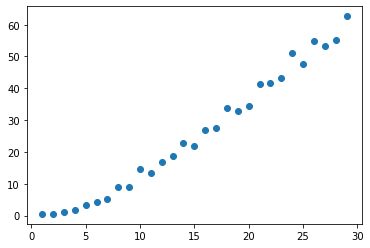

In [6]:
k = [i for i in range(1,30)]
plt.scatter(x=k, y=loss)

In [7]:
loss

[0.5532472999233523,
 0.5223223334886379,
 1.0229209568608497,
 1.7640125187128566,
 3.2018076175666,
 4.423314351921231,
 5.218195959146657,
 8.988215961919515,
 9.072083649215054,
 14.59994833328439,
 13.228371646949718,
 16.977491113571904,
 18.618057628464552,
 22.670469734452027,
 21.800834857776277,
 26.84483449021278,
 27.47892491327285,
 33.764149928602514,
 32.954737291372375,
 34.513402497045455,
 41.31041395694054,
 41.63805584890987,
 43.35513318603878,
 51.07260260653707,
 47.78690403257662,
 54.81396607987034,
 53.35376552796632,
 55.09151473491061,
 62.65238950667708]

In [8]:
loss = []
X = generate_data()
for k in range(1,30):
    loss.append(build_model(X,k,1000,0.05))

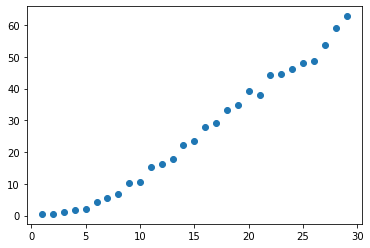

In [9]:
k = [i for i in range(1,30)]
plt.scatter(x=k, y=loss)

# Changing Sigma

In [10]:
loss = []
sigmas = np.arange(0,2.1,0.1)
for s in sigmas:
    X = generate_data(sigma=s)
    loss.append(build_model(X,30,5000,0.01))

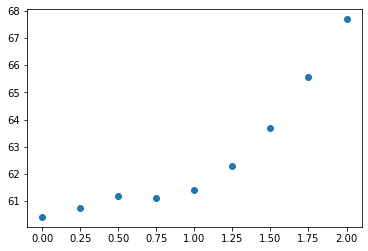

In [12]:
plt.scatter(x=sigmas, y=loss)

# Problem 2: PCA 

In [ ]:
def find_PC(X):
    # XT.X
    cov = (X.T).dot(X)
    # Eigen values and Eigen vectors
    return np.linalg.eig(cov)
X = generate_data()
evecs, evals = find_PC(X)
print(evecs)
print(evals)

# Dimensionality of Data

In [ ]:
'''
The data has 30 principle components and the variation around them is given by the eigenvalues
'''

# Is it Robust?

In [ ]:
'''Yes'''

# Changing Sigma

In [ ]:
eig_vecs = []
sigma = np.arange(0,2.25,0.25)
for s in sigma:
    X = generate_data(sigma=s)
    eig_vecs.append(find_PC(X))
print(eig_vecs)

# Problem 3: Correlation Graphs

In [ ]:
# SLR using SGD
def linear_reg(X,Y,epoch,alpha):
    # Initialize weights as random normal
    W_0 = 0
    W_1 = 1
    # Go through the iterations
    for i in range(epoch):
        Y_hat = W_0 + W_1 * X
        # Randomly choose a data point for SGD
        d = np.random.choice(len(X))
        # Find Loss = (Y_hat - Y) ^ 2
        #print(Y_hat[d],Y[d])
        # Update W_0 and W_1 using this data point and gradients
        W_0 = W_0 - alpha *  2 * (Y_hat[d] - Y[d])
        W_1 = W_1 - alpha * 2 * (Y_hat[d] - Y[d]) * X[d]
    err = 0
    # Return error at the end of epoch
    for i in range(len(X)):
        err = (Y[i] - (W_0 + W_1*X[i]))**2
    return err

In [ ]:
# The predictor variable that produces the least error is considered the most correlated
def find_most_correlated():
    # Initialize an array for errros
    err = np.ones((30,30))
    # Generate data
    X = generate_data()
    # A dictionary to store most related index for each index
    cor_dict = {}
    # Go through each feature
    for i in range(X.shape[1]):
        # Check error with every other feature except itself
        for j in range(X.shape[1]):
            if(j==i):
                continue
            # Runs SLR using SGD and returns error at 5000 iterations
            err[i][j] = linear_reg(X[:,i].T,X[:,j].T,5000,0.01)
    return err
err = find_most_correlated()


In [ ]:
df = pd.DataFrame()
indx = [i for i in range(1,31)]
df['Index'] = indx
for i in range(err.shape[0]):
    df['X'+str(i+1)] = err[i].T

In [ ]:
df